This notebook is outdated as of 19 Jan 2017.

Intro
=====

This is the Plume-Goldsmith analysis of H$^{13}$CN towards the low-mass Class 0 protostar, IRAS 16293-2422.

I have harvested the _Herschel_ HIFI data of this source taken as part of the CHESS programme (citations?) through the _Herschel Science Archive_ (Level 2.5 processed products), reduced them myself and fit Gaussians to the significant detected lines.

For the low-J lines, I have taken the integrated line fluxes from Caux et al. (2011), who observed the J=1-0, 3-2, and 4-3 lines.


In [2]:
from __future__ import division

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.units as u
import astropy.constants as c

# Assuming only H13CN lines are being considered.

class CHESS_line_flux(object):
    def __init__(self, flux, line_name, frequency):
        self.flux = flux
        self.name = line_name
        self.freq = frequency

        self.beam = self.compute_beamsize()
    
    def compute_beamsize(self):
        # it uses the frequency, as well as some telescope parameters!
        herschel_diameter = 3.5 * u.m
        wavelength = c.c / self.freq
        
        theta = 1.22 * (wavelength / herschel_diameter) * u.rad
        
        return theta.to(u.arcsec)

    
class Caux_IRAM_line_flux(object):
    
    def __init__(self, flux, line_name, frequency):
        self.flux = flux
        self.name = line_name
        self.freq = frequency

        self.beam = self.compute_beamsize()
    
    def compute_beamsize(self):
        # it uses the frequency, as well as some telescope parameters!
        IRAM_30m_diameter = 30 * u.m
        wavelength = c.c / self.freq
        
        theta = 1.22 * (wavelength / IRAM_30m_diameter) * u.rad
        
        return theta.to(u.arcsec)

    
class Caux_JCMT_line_flux(object):
    def __init__(self, flux, line_name, frequency):
        self.flux = flux
        self.name = line_name
        self.freq = frequency

        self.beam = self.compute_beamsize()
    
    def compute_beamsize(self):
        # it uses the frequency, as well as some telescope parameters!
        JCMT_diameter = 15 * u.m
        wavelength = c.c / self.freq
        
        theta = 1.22 * (wavelength / JCMT_diameter) * u.rad
        
        return theta.to(u.arcsec)

In [3]:
K_km_s = u.K * u.km / u.s

h13cn_10 = Caux_IRAM_line_flux(1.04*u.K*u.km/u.s, "H13CN 1-0", 86340*u.MHz)
h13cn_32 = Caux_IRAM_line_flux(8.16*u.K*u.km/u.s, "H13CN 3-2", 259011.8*u.MHz)
h13cn_43 = Caux_JCMT_line_flux(6.90*u.K*u.km/u.s, "H13CN 4-3", 345339.8*u.MHz)

h13cn_65 = CHESS_line_flux(0.93*K_km_s, "H13CN 6-5", 517970*u.MHz)
h13cn_76 = CHESS_line_flux(1.04*K_km_s, "H13CN 7-6", 604268*u.MHz)
h13cn_87 = CHESS_line_flux(1.60*K_km_s, "H13CN 8-7", 690552*u.MHz)
h13cn_98 = CHESS_line_flux(1.67*K_km_s, "H13CN 9-8", 776820*u.MHz)
h13cn_ten9 = CHESS_line_flux(0.88*K_km_s, "H13CN 10-9", 863071*u.MHz)

h13cn_lines = [h13cn_10, h13cn_32, h13cn_43, h13cn_65, h13cn_76, h13cn_87, h13cn_98, h13cn_ten9]

In [4]:
beams = [x.beam for x in h13cn_lines]
frequencies = [x.freq for x in h13cn_lines]
fluxes = [x.flux for x in h13cn_lines]

for x, freq, flux in zip(beams, frequencies, fluxes):
    print "{0}, {1}, {2}".format(x, freq.to(u.GHz), flux)

29.1254314654 arcsec, 86.34 GHz, 1.04 K km / s
9.70878451377 arcsec, 259.0118 GHz, 8.16 K km / s
14.5635675513 arcsec, 345.3398 GHz, 6.9 K km / s
41.6133822321 arcsec, 517.97 GHz, 0.93 K km / s
35.6704038519 arcsec, 604.268 GHz, 1.04 K km / s
31.2134112924 arcsec, 690.552 GHz, 1.6 K km / s
27.7470760212 arcsec, 776.82 GHz, 1.67 K km / s
24.9741719914 arcsec, 863.071 GHz, 0.88 K km / s


In [5]:
"""
http://home.strw.leidenuniv.nl/~moldata/datafiles/h13cn@xpol.dat
!TRANS + UP + LOW + EINSTEINA(s^-1) + FREQ(GHz) + E_u(K)
    1     2     1   2.2256e-05      86.3398600      4.14
    2     3     2   2.1360e-04     172.6778370     12.43
    3     4     3   7.7240e-04     259.0118140     24.86
    4     5     4   1.8984e-03     345.3397750     41.43
    5     6     5   3.7923e-03     431.6597890     62.15
    6     7     6   6.6521e-03     517.9698290     87.01
    7     8     7   1.0680e-02     604.2679030    116.01
    8     9     8   1.6074e-02     690.5520680    149.15
    9    10     9   2.3033e-02     776.8203590    186.43
   10    11    10   3.1755e-02     863.0706350    227.85
"""

A_10 = 2.2256e-05
A_21 = 2.1360e-04
A_32 = 7.7240e-04
A_43 = 1.8984e-03
A_54 = 3.7923e-03
A_65 = 6.6521e-03
A_76 = 1.0680e-02
A_87 = 1.6074e-02
A_98 = 2.3033e-02
A_ten9 = 3.1755e-02

h13cn_Auls = [A_10, A_32, A_43, A_65, A_76, A_87, A_98, A_ten9]
h13cn_Auls = [x / u.s for x in h13cn_Auls]

In [6]:
def N_upper_from_line(line_object, A_ul):
    
    N_u = (
     (8*np.pi * c.k_B * line_object.freq**2) / 
        (A_ul * c.h * c.c**3) * 
        line_object.flux
        )
    
    return N_u.to(u.cm**-2)

In [7]:
N_upper_array_beamfilled = [N_upper_from_line(line_xx, A_xx) for line_xx, A_xx in zip(h13cn_lines, h13cn_Auls)]

print u.Quantity(N_upper_array_beamfilled)

[  6.77041507e+11   1.37750116e+12   8.42480022e+11   7.29018203e+10
   6.91076712e+10   9.22558199e+10   8.50377459e+10   4.01207075e+10] 1 / cm2


In [8]:
source_size = 0.5 * u.arcsec
source_area = np.pi * (source_size/2)**2

N_u_beam_corrected = u.Quantity(
    [N_upper_from_line(line_xx, A_xx) * line_xx.beam**2/source_area for line_xx, A_xx in zip(h13cn_lines, h13cn_Auls)])

print N_u_beam_corrected

[  2.92502876e+15   6.61289774e+14   9.10050034e+14   6.42946022e+14
   4.47829213e+14   4.57768972e+14   3.33438925e+14   1.27444439e+14] 1 / cm2


In [9]:
print h13cn_10.beam**2 / source_size

1696.58151609 arcsec


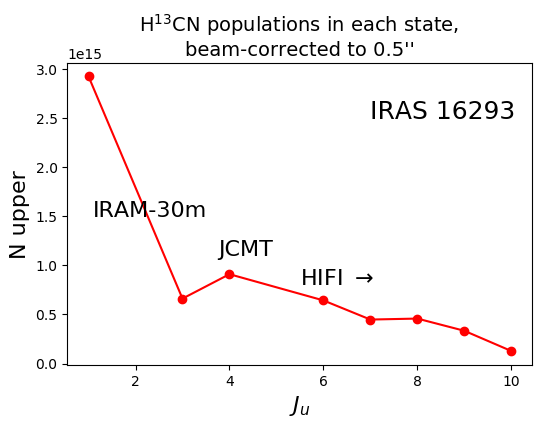

In [10]:
fig = plt.figure()

plt.plot([1,3,4,6,7,8,9,10], N_u_beam_corrected, 'ro-')
plt.title("H$^{13}$CN populations in each state, \nbeam-corrected to 0.5''", fontsize=14)
#plt.plot([1,4,6,7], u.Quantity([N_1_nw, N_4_nw, N_6, N_7]), 'bo-')
plt.xlabel("$J_u$", fontsize=16)
plt.ylabel("N upper", fontsize=16)
#plt.xlim(0,8)

# fig2 = plt.figure()
# plt.plot([1,4,6,7], u.Quantity([N_1_beamcorr, N_4_beamcorr, N_6_beamcorr, N_7_beamcorr]), 'ro-')
# plt.plot([1,4,6,7], u.Quantity([N_1_nw_beamcorr, N_4_nw_beamcorr, N_6_beamcorr, N_7_beamcorr]), 'bo-')
# plt.title("Populations in each state, \nbeam-corrected to 15''")
# plt.xlabel("$J_u$", fontsize=16)
# plt.ylabel("N upper", fontsize=16)
# plt.xlim(0,8)

plt.text(7, 2.5e15, "IRAS 16293", fontsize=18)

plt.text(1.1, 1.5e15, "IRAM-30m", fontsize=16)
plt.text(3.75, 1.1e15, "JCMT", fontsize=16)
plt.text(5.5, 0.8e15, "HIFI $\\rightarrow$", fontsize=16)

plt.show()

In [11]:
np.sum(N_u_beam_corrected)

<Quantity 6505796135357689.0 1 / cm2>

[  3.45980755e+14   7.82192431e+13   1.07643317e+14   7.60494916e+13
   5.29705183e+13   5.41462214e+13   3.94401084e+13   1.50744922e+13] 1 / cm2


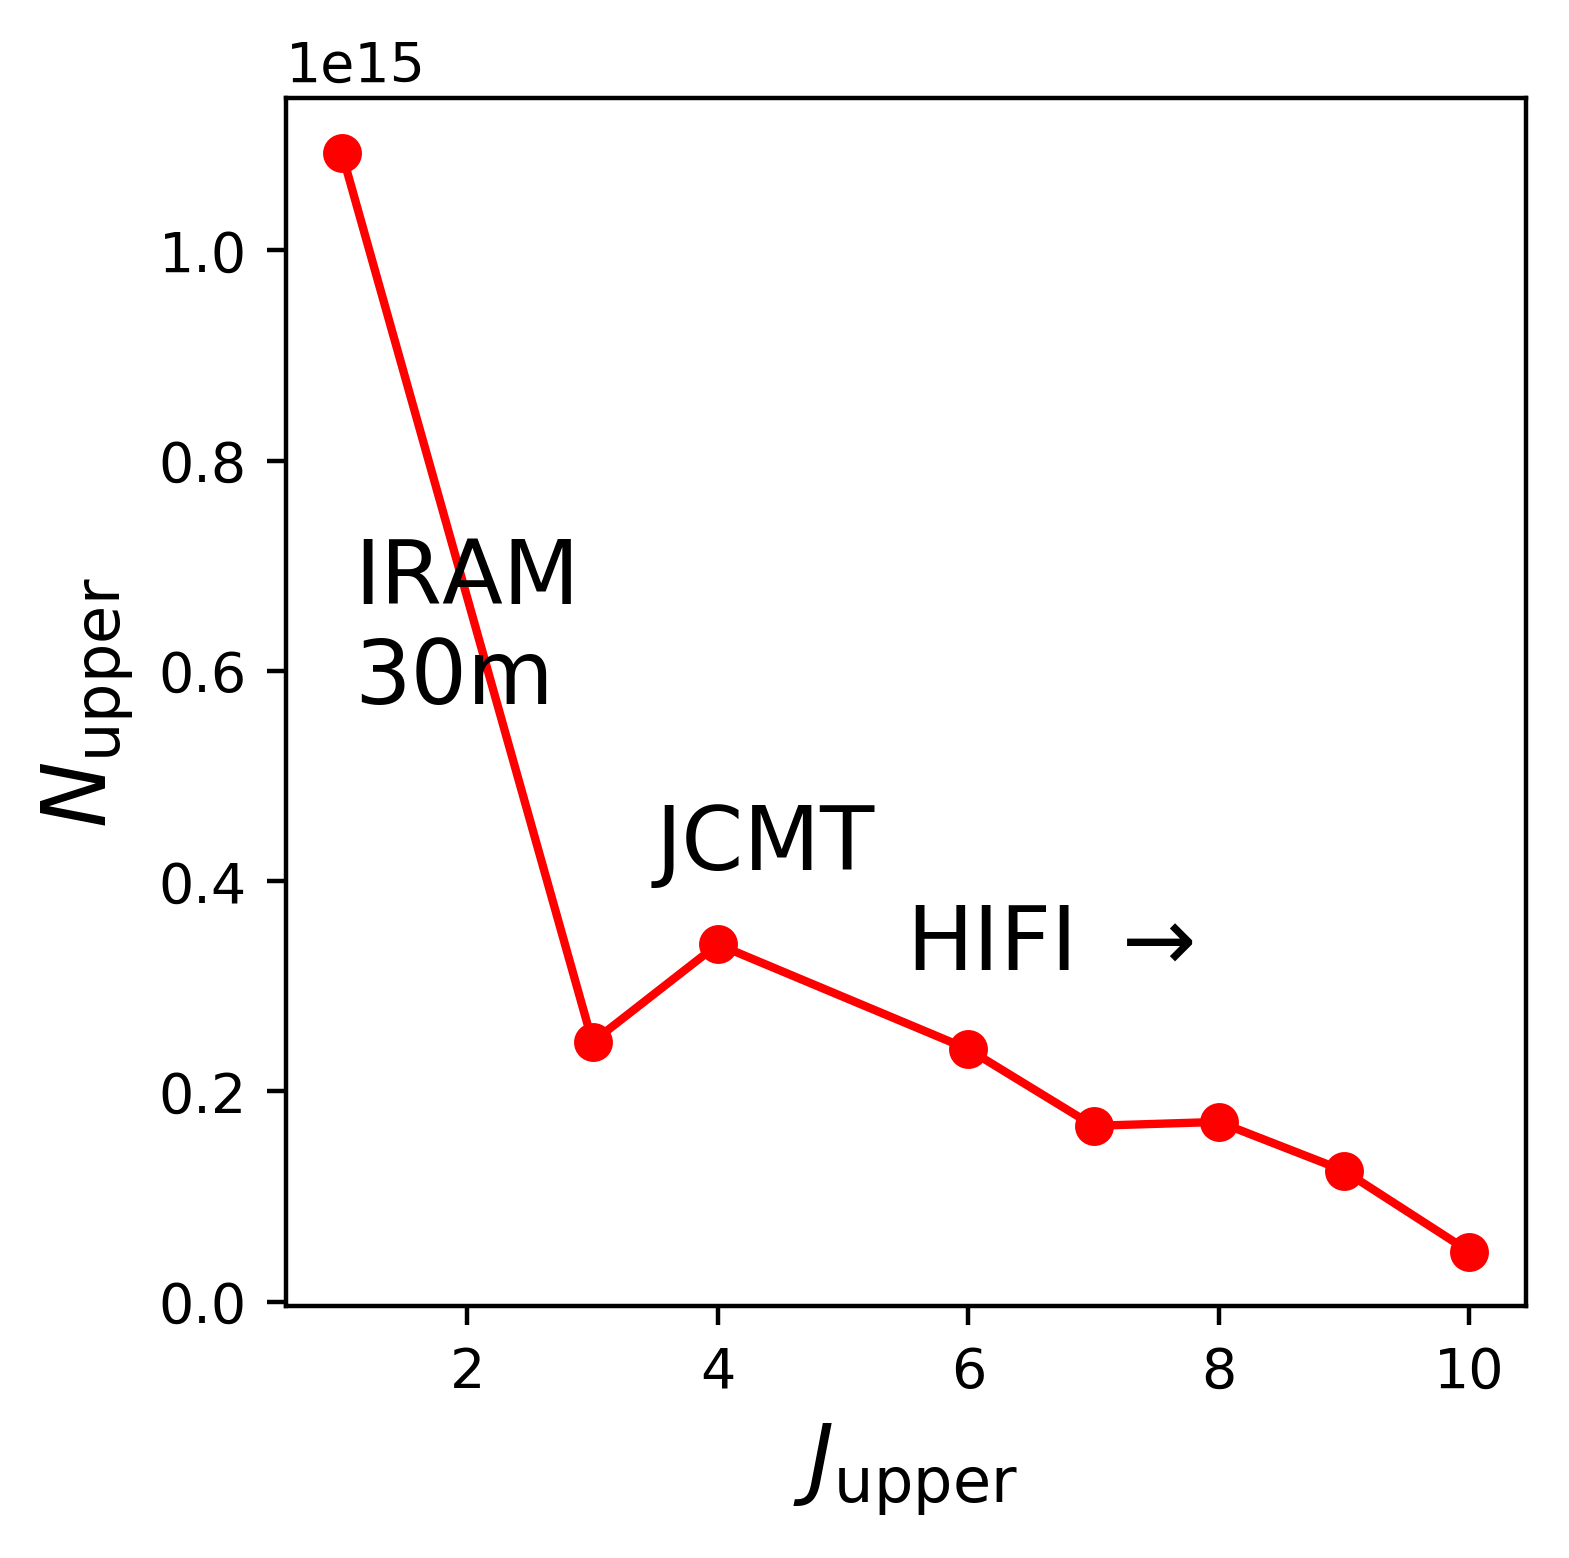

<Quantity 769524147010262.9 1 / cm2>

In [27]:
# Now with the beamsize solid angle at 1.66 arcsec^2
# per the ALMA source size measurement situation

source_area = 1.66 * u.arcsec**2

N_u_beam_corrected = u.Quantity(
    [N_upper_from_line(line_xx, A_xx) * line_xx.beam**2/source_area for line_xx, A_xx in zip(h13cn_lines, h13cn_Auls)])

print N_u_beam_corrected
fig = plt.figure(figsize=(4,4), dpi=400)

plt.plot([1,3,4,6,7,8,9,10], tau_correction*N_u_beam_corrected, 'ro-')
# plt.title("H$^{13}$CN populations in each state, \nbeam-corrected to 1.66 arcsec$^2$", fontsize=14)
plt.xlabel(r"$J_{\rm{upper}}$", fontsize=16)
plt.ylabel(r"$N_{\rm{upper}}$", fontsize=16)

# plt.text(6, tau_correction*2.5e14, "IRAS 16293", fontsize=18)

plt.text(1.1, tau_correction*1.8e14, "IRAM\n30m", fontsize=16)
plt.text(3.5, tau_correction*1.3e14, "JCMT", fontsize=16)
plt.text(5.5, tau_correction*1e14, "HIFI $\\rightarrow$", fontsize=16)

plt.show()

np.sum(N_u_beam_corrected)

In [15]:
f_c = 1.8 # trust me
Ntot_h13cn = f_c * np.sum(N_u_beam_corrected)

Ntot_h13cn

<Quantity 1385143464618473.2 1 / cm2>

In [16]:
ratio_12C_13C = 69 # plus or minus 6; Wilson '99, "local ISM" value

Ntot_HCN = Ntot_h13cn * ratio_12C_13C

Ntot_HCN

<Quantity 9.557489905867466e+16 1 / cm2>

In [17]:
# optical depth correction, assuming all lines have the same optical depth
tau = 3
tau_correction = tau / (1-np.e**(-tau))

Ntot_HCN_taucorrected = Ntot_HCN * tau_correction

Ntot_HCN_taucorrected

<Quantity 3.017478373858062e+17 1 / cm2>

In [28]:
# from Schöier et al 2004
N_H2 = 1.6e24 * u.cm**-2

X_HCN = Ntot_HCN_taucorrected / N_H2

X_HCN

<Quantity 1.885923983661289e-07>

In [31]:
# now let's pull it together

H2_per_H = 1/2.
H_per_Si = 1e6/31.6

HCN_per_Si = X_HCN * H2_per_H * H_per_Si

HCN_per_Si

<Quantity 0.0029840569361729253>

In [37]:
tau_correction

3.157187089473768